# Notebook objective:
- Basic Understanding of DOCVQA original dataset

# Importing Libraries

In [1]:
!pip install -q transformers
!pip install -q datasets      # huggingface datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.4/492.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import os
import json
from PIL import Image
from datasets import Dataset        # Huggingface dataset
from google.colab import data_table
from transformers import DonutProcessor
import inspect

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# S-0: Dataset details: Contain three folder Train, Validation and Test
### Each dataset folder contain three things:
1. documents: which contains .png files
2. ocr_results: ocr details result of each individual image in .joson file
3. single .json file which consists overall detail information of all the file

# S-1: Accessing and Analysing Main json file data and convert it to DataFrame

In [6]:
train_path_main = "/content/drive/MyDrive/docVqa_dataset/train/train_v1.0.json"

In [7]:
## Training main json data link

# Open the JSON file
with open(train_path_main, 'r') as file:
  # Load the contents of the file into a dictionary
  data_train = json.load(file)

In [8]:
data_train

{'dataset_name': 'docvqa',
 'dataset_version': '1.0',
 'dataset_split': 'train',
 'data': [{'questionId': 337,
   'question': 'what is the date mentioned in this letter?',
   'image': 'documents/xnbl0037_1.png',
   'docId': 279,
   'ucsf_document_id': 'xnbl0037',
   'ucsf_document_page_no': '1',
   'answers': ['1/8/93'],
   'data_split': 'train'},
  {'questionId': 338,
   'question': 'what is the contact person name mentioned in letter?',
   'image': 'documents/xnbl0037_1.png',
   'docId': 279,
   'ucsf_document_id': 'xnbl0037',
   'ucsf_document_page_no': '1',
   'answers': ['P. Carter', 'p. carter'],
   'data_split': 'train'},
  {'questionId': 339,
   'question': "Which corporation's letterhead is this?",
   'image': 'documents/mxcj0037_1.png',
   'docId': 280,
   'ucsf_document_id': 'mxcj0037',
   'ucsf_document_page_no': '1',
   'answers': ['Brown & Williamson Tobacco Corporation'],
   'data_split': 'train'},
  {'questionId': 340,
   'question': 'Who is in  cc in this letter?',
   

In [9]:
type(data_train)

dict

In [10]:
data_train.keys()

dict_keys(['dataset_name', 'dataset_version', 'dataset_split', 'data'])

In [11]:
type(data_train['dataset_name']), type(data_train['dataset_version']), type(data_train['dataset_split']), type(data_train['data'])

(str, str, str, list)

In [12]:
len(data_train['data'])

39463

In [13]:
type(data_train['data'][0])

dict

In [14]:
data_train['data'][0]         ## sample data

{'questionId': 337,
 'question': 'what is the date mentioned in this letter?',
 'image': 'documents/xnbl0037_1.png',
 'docId': 279,
 'ucsf_document_id': 'xnbl0037',
 'ucsf_document_page_no': '1',
 'answers': ['1/8/93'],
 'data_split': 'train'}

In [15]:
data_train['data'][0].keys()

dict_keys(['questionId', 'question', 'image', 'docId', 'ucsf_document_id', 'ucsf_document_page_no', 'answers', 'data_split'])

## Comm:
- Main json dataset contains 3 keys:
1. "dataset_name": "docvqa" --> value is a string,
2. "dataset_version": "1.0" --> value is a string,
3. "dataset_split": "train/val/test"  --> value is a string,
4. "data": --> value is a list of dictionary
- Now our main focus will be on data key i.e. list of dictionary

## Comm:
- As data keys is our main are of focus so we will convert 'data' into dataframe
- 'data' is a list having dictionary as element
- Element of 'data' dictionary having keys: 'questionId', 'question', 'image', 'docId', 'ucsf_document_id', 'ucsf_document_page_no', 'answers', 'data_split'

## Make Main.json 'data' into dataframe

In [16]:
## Convert 'data' list into dataframe by passing into the dataframe
df_train = pd.DataFrame(data_train['data'])

In [17]:
df_train.head()

,questionId,question,image,docId,ucsf_document_id,ucsf_document_page_no,answers,data_split
0,337,what is the date mentioned in this letter?,documents/xnbl0037_1.png,279,xnbl0037,1,[1/8/93],train
1,338,what is the contact person name mentioned in l...,documents/xnbl0037_1.png,279,xnbl0037,1,"[P. Carter, p. carter]",train
2,339,Which corporation's letterhead is this?,documents/mxcj0037_1.png,280,mxcj0037,1,[Brown & Williamson Tobacco Corporation],train
3,340,Who is in cc in this letter?,documents/mxcj0037_1.png,280,mxcj0037,1,[T.F. Riehl],train
4,341,what is the subject of this letter?,documents/mxcj0037_1.png,280,mxcj0037,1,[Review of existing Brainstorming Ideas/483],train


### Comm:
- data list contain dictionary element contains 8 keys
- ** 'image' contain the path inside document folder, so we can access any file details by giving the main 'train' folder path

# S-2: Accessing and Analysing 'Document' Folder

In [18]:
base_train_path = '/content/drive/MyDrive/docVqa_dataset/train'

In [19]:
# Define a function to join the base path with the image path
def join_paths(image_path):
  return os.path.join(base_train_path, image_path)

# Apply the function to create a new column with the full image path
df_train['full_path_image'] = df_train['image'].apply(join_paths)

In [20]:
# data_table.DataTable(df_train)
df_train.head()

,questionId,question,image,docId,ucsf_document_id,ucsf_document_page_no,answers,data_split,full_path_image
0,337,what is the date mentioned in this letter?,documents/xnbl0037_1.png,279,xnbl0037,1,[1/8/93],train,/content/drive/MyDrive/docVqa_dataset/train/do...
1,338,what is the contact person name mentioned in l...,documents/xnbl0037_1.png,279,xnbl0037,1,"[P. Carter, p. carter]",train,/content/drive/MyDrive/docVqa_dataset/train/do...
2,339,Which corporation's letterhead is this?,documents/mxcj0037_1.png,280,mxcj0037,1,[Brown & Williamson Tobacco Corporation],train,/content/drive/MyDrive/docVqa_dataset/train/do...
3,340,Who is in cc in this letter?,documents/mxcj0037_1.png,280,mxcj0037,1,[T.F. Riehl],train,/content/drive/MyDrive/docVqa_dataset/train/do...
4,341,what is the subject of this letter?,documents/mxcj0037_1.png,280,mxcj0037,1,[Review of existing Brainstorming Ideas/483],train,/content/drive/MyDrive/docVqa_dataset/train/do...


In [21]:
## Make sample image path
sample_1_img_path = df_train['full_path_image'][0]

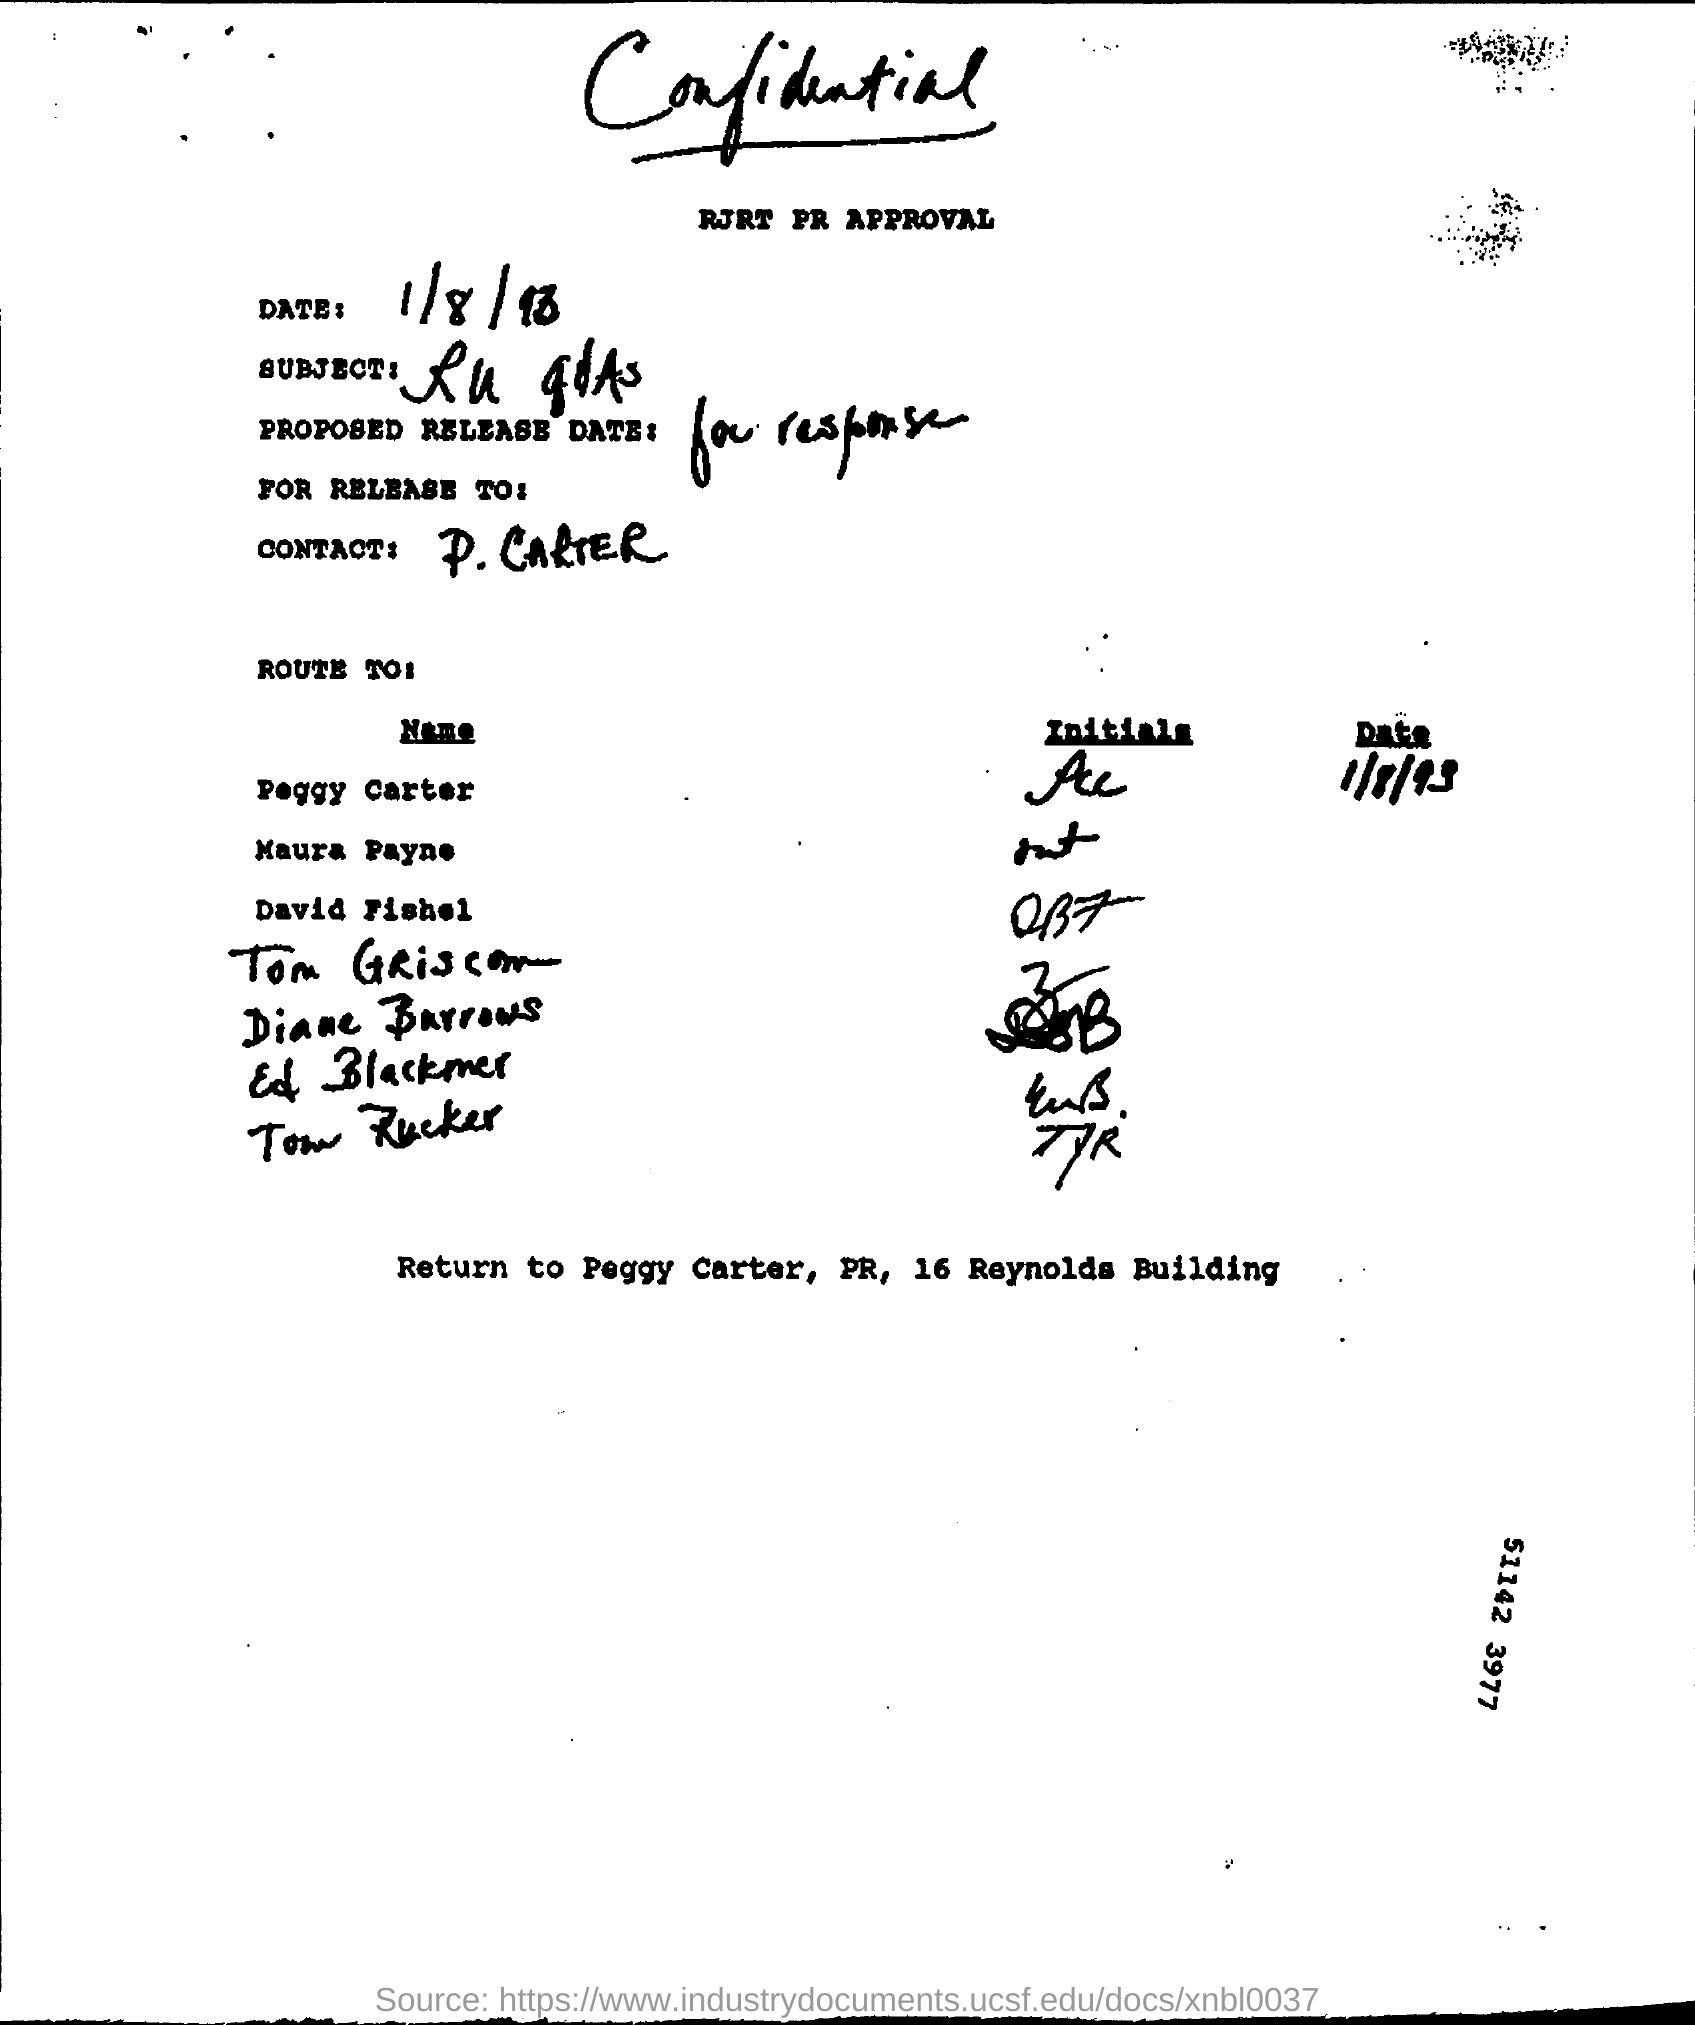

In [23]:
## Visualising the image using PILLOW
sample_image_1 = Image.open(sample_1_img_path)
sample_image_1

# S-3: Accessing and Analysing 'OCR' Folder
- Note : OCR folder contains json files so we have to read this file

In [24]:
## Checking list of dirs and files in the main train folder
dir_list = os.listdir(base_train_path)    ## train dir contains two sub dir and one json file
dir_list, dir_list[1]

(['train_v1.0.json', 'ocr_results', 'documents'], 'ocr_results')

In [25]:
ocr_base_dir = os.path.join(base_train_path, dir_list[1])
ocr_base_dir

'/content/drive/MyDrive/docVqa_dataset/train/ocr_results'

## ** Single Sample document data understanding from Main json:

In [26]:
sample_1_details = data_train['data'][0]

In [27]:
sample_1_details   # first sample

{'questionId': 337,
 'question': 'what is the date mentioned in this letter?',
 'image': 'documents/xnbl0037_1.png',
 'docId': 279,
 'ucsf_document_id': 'xnbl0037',
 'ucsf_document_page_no': '1',
 'answers': ['1/8/93'],
 'data_split': 'train'}

In [28]:
## create sample 1 image path
sample_ocr_1_path = ocr_base_dir + '/' + sample_1_details['ucsf_document_id'] + '_' + sample_1_details['ucsf_document_page_no'] + '.json'
sample_ocr_1_path

'/content/drive/MyDrive/docVqa_dataset/train/ocr_results/xnbl0037_1.json'

In [29]:
## Open 1st sample ocr JSON details
with open(sample_ocr_1_path, 'r') as f:
  sample_ocr_1 = json.load(f)

In [30]:
type(sample_ocr_1)

dict

In [31]:
sample_ocr_1.keys()

dict_keys(['status', 'recognitionResults'])

In [32]:
type(sample_ocr_1['status']), type(sample_ocr_1['recognitionResults'])

(str, list)

In [33]:
len(sample_ocr_1['recognitionResults'])

1

In [34]:
type(sample_ocr_1['recognitionResults'][0])

dict

In [35]:
sample_ocr_1['recognitionResults'][0]

{'page': 1,
 'clockwiseOrientation': 359.79,
 'width': 1695,
 'height': 2025,
 'unit': 'pixel',
 'lines': [{'boundingBox': [576, 30, 992, 26, 993, 126, 577, 130],
   'text': 'Confidential',
   'words': [{'boundingBox': [586, 30, 993, 36, 994, 119, 584, 131],
     'text': 'Confidential',
     'confidence': 'Low'}]},
  {'boundingBox': [1081, 34, 1124, 31, 1125, 53, 1082, 56],
   'text': '.. ..',
   'words': [{'boundingBox': [1080, 34, 1097, 32, 1099, 54, 1081, 55],
     'text': '..',
     'confidence': 'Low'},
    {'boundingBox': [1102, 32, 1122, 31, 1124, 53, 1103, 54], 'text': '..'}]},
  {'boundingBox': [695, 202, 994, 204, 994, 236, 694, 234],
   'text': 'RJRT PR APPROVAL',
   'words': [{'boundingBox': [699, 203, 779, 204, 779, 234, 699, 234],
     'text': 'RJRT',
     'confidence': 'Low'},
    {'boundingBox': [793, 204, 832, 204, 832, 234, 793, 234], 'text': 'PR'},
    {'boundingBox': [848, 204, 995, 204, 995, 237, 848, 234],
     'text': 'APPROVAL'}]},
  {'boundingBox': [254, 295, 3

In [36]:
sample_ocr_1['recognitionResults'][0].keys()

dict_keys(['page', 'clockwiseOrientation', 'width', 'height', 'unit', 'lines'])

In [37]:
type(sample_ocr_1['recognitionResults'][0]['page']), type(sample_ocr_1['recognitionResults'][0]['clockwiseOrientation'])

(int, float)

In [38]:
type(sample_ocr_1['recognitionResults'][0]['width']), type(sample_ocr_1['recognitionResults'][0]['height']), type(sample_ocr_1['recognitionResults'][0]['unit'])

(int, int, str)

In [39]:
type(sample_ocr_1['recognitionResults'][0]['lines'])

list

In [40]:
len(sample_ocr_1['recognitionResults'][0]['lines'])

27

In [41]:
type(sample_ocr_1['recognitionResults'][0]['lines'][0])

dict

In [42]:
sample_ocr_1['recognitionResults'][0]['lines'][0]   ## deatils of 1st line

{'boundingBox': [576, 30, 992, 26, 993, 126, 577, 130],
 'text': 'Confidential',
 'words': [{'boundingBox': [586, 30, 993, 36, 994, 119, 584, 131],
   'text': 'Confidential',
   'confidence': 'Low'}]}

In [43]:
sample_ocr_1['recognitionResults'][0]['lines'][0].keys()

dict_keys(['boundingBox', 'text', 'words'])

## Comm: ocr data is little bit complicated. Let's understand properly
1. ocr json file is a dictionary having keys 'status', 'recognitionResults'
2. 'recognitionResults' is a list whose each element is a dictionary
3. Inside this dictionary having keys 'page', 'clockwiseOrientation', 'width', 'height', 'unit', 'lines'
4. Here 'lines' is a list of dictionary which will be our main area of focus and having keys 'boundingBox', 'text', 'words'
5. Now we have iterate of the 'text' and will collect

In [44]:
## Accessing words and combining all the texts
words = ""

for item in sample_ocr_1['recognitionResults'][0]['lines']:
  # print(item['text'])
  words += item['text']


print('-----------------------------------------------------Final Sentence----------------------------------------------------')
words

-----------------------------------------------------Final Sentence----------------------------------------------------


'Confidential.. ..RJRT PR APPROVALDATE :1/8/13Ru alAsPROPOSED RELEASE DATE:for responseFOR RELEASE TO:CONTACT:P. CARTERROUTE TOInitialspatePeggy CarterAcMaura PayneDavid FishelTom GRISComDiane BarrowsEd BlackmerTow RuckerTRReturn to Peggy Carter, PR, 16 Reynolds Building51142 3977. .Source: https://www.industrydocuments.ucsf.edu/docs/xnb10037'

#4. Working the same on Whole dataset from dataframe followed by hf datasets

In [45]:
# data_table.DataTable(df_train)
df_train.head()

,questionId,question,image,docId,ucsf_document_id,ucsf_document_page_no,answers,data_split,full_path_image
0,337,what is the date mentioned in this letter?,documents/xnbl0037_1.png,279,xnbl0037,1,[1/8/93],train,/content/drive/MyDrive/docVqa_dataset/train/do...
1,338,what is the contact person name mentioned in l...,documents/xnbl0037_1.png,279,xnbl0037,1,"[P. Carter, p. carter]",train,/content/drive/MyDrive/docVqa_dataset/train/do...
2,339,Which corporation's letterhead is this?,documents/mxcj0037_1.png,280,mxcj0037,1,[Brown & Williamson Tobacco Corporation],train,/content/drive/MyDrive/docVqa_dataset/train/do...
3,340,Who is in cc in this letter?,documents/mxcj0037_1.png,280,mxcj0037,1,[T.F. Riehl],train,/content/drive/MyDrive/docVqa_dataset/train/do...
4,341,what is the subject of this letter?,documents/mxcj0037_1.png,280,mxcj0037,1,[Review of existing Brainstorming Ideas/483],train,/content/drive/MyDrive/docVqa_dataset/train/do...


In [46]:
df_train.shape

(39463, 9)

### Comm: For our model experiment purpose we will take only 100 rows from the dataframe and we will form one subset dataframe and will pass convert it to dataset object

In [47]:
## Making subset of the training dataframe
df_sub = df_train.iloc[:100]

In [48]:
df_sub.shape

(100, 9)

In [49]:
## Convert dataframe into dataset object

# hfdataset_train = Dataset.from_pandas(df_train)
hfdataset_sub = Dataset.from_pandas(df_sub)

In [50]:
hfdataset_sub.shape

(100, 9)

In [51]:
len(hfdataset_sub )

100

In [52]:
type(hfdataset_sub )

datasets.arrow_dataset.Dataset

In [53]:
hfdataset_sub.column_names

['questionId',
 'question',
 'image',
 'docId',
 'ucsf_document_id',
 'ucsf_document_page_no',
 'answers',
 'data_split',
 'full_path_image']

In [54]:
hfdataset_sub[0]

{'questionId': 337,
 'question': 'what is the date mentioned in this letter?',
 'image': 'documents/xnbl0037_1.png',
 'docId': 279,
 'ucsf_document_id': 'xnbl0037',
 'ucsf_document_page_no': '1',
 'answers': ['1/8/93'],
 'data_split': 'train',
 'full_path_image': '/content/drive/MyDrive/docVqa_dataset/train/documents/xnbl0037_1.png'}